In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# 1. Show a breakdown of distance from home by job role and attrition

Overview of the data:

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<AxesSubplot:xlabel='Department', ylabel='DistanceFromHome'>

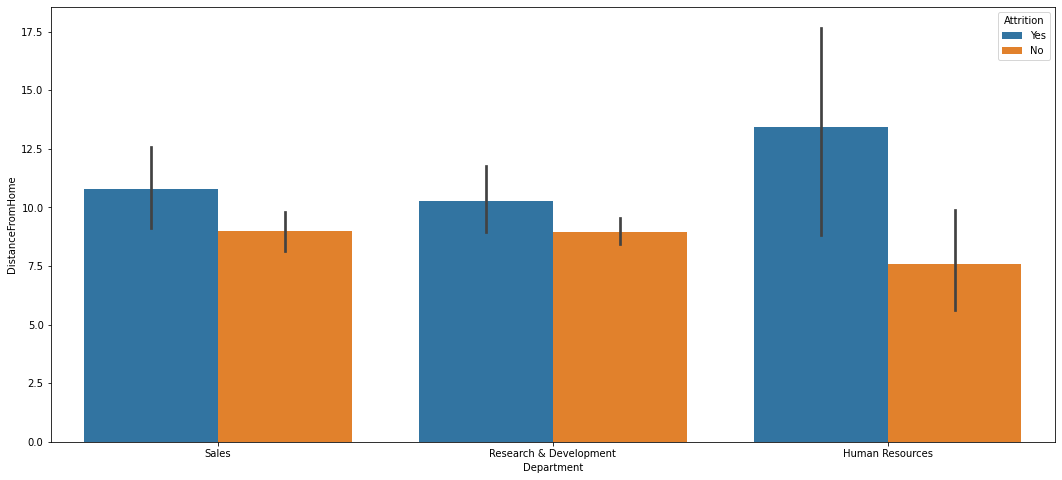

In [4]:
fig, ax = plt.subplots(figsize=(18,8))
sns.barplot(data=df, x="Department", y="DistanceFromHome", hue="Attrition", ax=ax)

Employees who left the company generally lived a distance longer than 10km away. Collectively, employees in HR who left the company
lived the furthest.

In [5]:
# filter employees who left the company
distance_attr = df[df['Attrition'].str[0:3]=='Yes']
dept_attr = distance_attr.groupby(['Department', 'Attrition']).size().reset_index().rename(columns={0:'count'})

dept_attr

,Department,Attrition,count
0,Human Resources,Yes,12
1,Research & Development,Yes,133
2,Sales,Yes,92


In [6]:
distance_attr = pd.DataFrame(distance_attr[['Department', 'DistanceFromHome']])

# get collective distance from by department
dept_dist = distance_attr.groupby(['Department']).sum().reset_index().rename(columns={0:'count'})
dept_dist.sort_values(by=['DistanceFromHome'], inplace=True, ascending=False)
dept_dist.head()

,Department,DistanceFromHome
1,Research & Development,1365
2,Sales,994
0,Human Resources,161


In [ ]:
# 2. Compare average monthly income by education and attrition

Let us create a monthly income column first

In [42]:
df['MonthlyIncome'] = df['DailyRate']*df['StandardHours']
df['MonthlyIncome'].head()

0     88160
1     22320
2    109840
3    111360
4     47280
Name: MonthlyIncome, dtype: int64

Monthly income by education:

In [46]:
employee_crosstab = pd.crosstab(df['MonthlyIncome'], df['Education'], margins=False) 
employee_crosstab

Education,1,2,3,4,5
MonthlyIncome,,,,,
8160,0,0,0,1,0
8240,0,0,1,0,0
8320,0,0,1,0,0
8400,0,0,1,0,0
8480,0,0,1,0,0
...,...,...,...,...,...
119360,0,0,0,1,0
119600,0,1,1,1,0
119680,1,0,1,0,0


Monthly income by attrition:

In [ ]:
employee_crosstab = pd.crosstab(df['MonthlyIncome'], df['Eduction'], margins=False)